In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
home_dir = os.path.join(r'Z:\balint\numt\Michael\data/')

In [3]:
#read pandas dataframe
numt_array = pd.read_csv(home_dir + 'numt_master_array.csv')
numt_array.head()

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)",ensembl_gene_id,ensembl_description
0,17245,0.0,0.0,MT,0,0,17245,17245,+,+,17245,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,NaN,NaN,TACAAATTGTATAATATTTGGACTAAACCCCCTTTCCCACCCCAAG...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,ENSOCUG00000029081,NaN
1,3398,0.0,0.0,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,CCTTCGCCTCAAAACGAGAAGTAGAGACTATTGAACTAACAACCAC...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...,ENSOCUG00000006104,cilia and flagella associated protein 300 [Sou...
2,3120,0.0,0.0,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,TACCGCCATCTTCAGCGAACCCTAAAAAGGAGCAAAAGTAAGCTCA...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...,ENSOCUG00000031196,NaN
3,1888,0.0,0.0,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TGCCTAGGCGCAATCACTACCTTATTCACAGCCCTATGTGCCCTCA...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...,ENSOCUG00000037635,NaN
4,1824,0.0,0.0,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,ATATGAAAGCCCCTGCAATATCTCAATATCAAACCCCCTTATTCGT...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...,NaN,NaN


In [4]:
#get g_ids and drop the ones that dont have corresponding sequences
g_ids = numt_array['g_id'].drop_duplicates()
g_ids = g_ids.drop(labels = [0,65])

In [5]:
#create dictionary from the numtless sequences
def create_dictionary(g_id):
    global numtless_sequences
    filename = 'numtless_sequences/%s.fasta' % g_id
    sequence = ''
    with open (home_dir + filename) as infile:
        content = infile.readlines()
        try:
            sequence = content[1]
        except IndexError:
            pass
    numtless_sequences[g_id] = sequence
    current_index = g_ids[g_ids == g_id].index[0]
    if current_index % 5 == 0:
        print('done for %s numts!' % current_index)

In [6]:
#create vector for numtless sequences
numtless_sequences = pd.Series(index = g_ids)
g_ids.apply(create_dictionary)
numtless_sequences

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


done for 20 numts!
done for 25 numts!
done for 40 numts!
done for 45 numts!
done for 70 numts!
done for 95 numts!
done for 100 numts!
done for 105 numts!
done for 125 numts!


g_id
1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018

In [170]:
lengths = g_ids.apply(lambda x : numt_array.loc[numt_array['g_id'] == x]['g_length'].tolist())
lengths.index = g_ids
lengths

g_id
1               [4680, 698, 1012, 375, 371, 467, 393, 658, 773]
GL019308                           [4892, 3439, 1414, 837, 820]
AAGW02081594                            [3040, 2339, 1650, 577]
GL019326                     [1851, 1451, 1315, 1420, 995, 833]
GL018741                           [1945, 1590, 1074, 552, 503]
18                                        [1440, 407, 292, 482]
9                                          [720, 822, 397, 273]
12                                              [419, 216, 368]
GL018705                                                  [834]
17                                              [595, 407, 352]
GL018700                                                  [896]
19                                                        [930]
GL019465                              [930, 677, 795, 424, 916]
GL018817                                  [674, 1070, 784, 720]
13                                                   [351, 126]
GL018826              [1193, 891, 8

In [171]:
#function for sampling the genome reagrding the corresponding numt size
def nuge_sampling(g_id):
    sequence_to_sample = numtless_sequences[g_id]
    numt_sizes = lengths[g_id]
    samples = []
    for index, numt_size in enumerate(numt_sizes):
        seed_value = index
        np.random.seed(seed_value)
        start = np.random.randint(0, len(sequence_to_sample) - numt_size)
        end = start + numt_size
        sample_sequence = sequence_to_sample[start:end]
        unknown_nucleotides = sample_sequence.count('N') / len(sample_sequence)
        if unknown_nucleotides < 0.05:
            samples.append(sample_sequence)
        else:
            seed_value += 10
            np.random.seed(seed_value)
            start = np.random.randint(0, len(sequence_to_sample) - numt_size)
            end = start + numt_size
            sample_sequence = sequence_to_sample[start:end]
            samples.append(sample_sequence)
    return samples

In [172]:
#get genom samples based on numts
nuge_samples = g_ids.apply(nuge_sampling)
nuge_samples.index = g_ids
nuge_samples

g_id
1               [GTATCTCATTCAGTCTTTCAAAAATATCTATTGAGAATCTATTGT...
GL019308        [GTTCCTGTCCCAGATGCCCCACTTCCAATTAAGCTACTATTGATG...
AAGW02081594    [TACAAAATGATTCTAAATTTTTATAGCAAATATCAGTCTTTACTC...
GL019326        [ACCAGTAACTTCCAGAGGCTGCATGAGCAGGATTCAGGATCTGGA...
GL018741        [AACTTGGAAGAATAAGAAATGAGAAAGTAGGTGATGCTGATTGAG...
18              [TGTGCATATATATGTAGCACATATACATACACATTATTGTATACA...
9               [AGTCTGATTATAGGGAGATAGAGACTTCTGTTAGATTATTAAACA...
12              [TAGCCATACGAGACTTCATTCAGGGGAAACTGAAATGTGGCTCAT...
GL018705        [CATGACATCACCCCATGCCTGTCCCCAGTCCCTCCTTCAGTGCCT...
17              [AAAAGTTTGTTTGTATTTATTTGAAGGGGGGGGAGAGAGAGAGAG...
GL018700        [TGAAGCTTTAACCCACTGAGCCACAATGTTGACCCCTAGAATATA...
19              [ATCAGATGCAGAGTCCAGTGCATTCTCCCTCCATGATGTATCTTT...
GL019465        [CATACAACAATAATACTCCAACTTTCCTGATGAAATTTCAACAAG...
GL018817        [GATACCTGCCTGGGAATGAGGAGTCCACCTCTCCCGGATCTGATC...
13              [GGGAGCCTGCAGAGCGCACTTGCTCATGAGCCCCAAGCTAGAAGT...
GL018

In [173]:
#function for calculating gc contents of sequence samples
def gc_content(sample_sequences):
    gc_contents = []
    for sample_sequence in sample_sequences:
        g_content = sample_sequence.upper().count('G')
        c_content = sample_sequence.upper().count('C')
        gc_content = (g_content + c_content) / len(sample_sequence)
        gc_contents.append(gc_content)
    return gc_contents

In [174]:
#calculate gc content of sample sequences
gc_content_samples = nuge_samples.apply(gc_content)
gc_content_samples.index = g_ids
gc_content_samples

g_id
1               [0.43995726495726495, 0.2851002865329513, 0.33...
GL019308        [0.44317252657399836, 0.4495492875835999, 0.37...
AAGW02081594    [0.36546052631578946, 0.5019238991021804, 0.42...
GL019326        [0.46947595894111294, 0.4583046175051689, 0.37...
GL018741        [0.35167095115681235, 0.3081761006289308, 0.39...
18              [0.43125, 0.4176904176904177, 0.63013698630136...
9               [0.2569444444444444, 0.4367396593673966, 0.468...
12              [0.441527446300716, 0.4305555555555556, 0.4429...
GL018705                                     [0.4844124700239808]
17              [0.47058823529411764, 0.371007371007371, 0.318...
GL018700                                    [0.36941964285714285]
19                                           [0.5193548387096775]
GL019465        [0.37311827956989246, 0.4357459379615953, 0.52...
GL018817        [0.5786350148367952, 0.5364485981308411, 0.475...
13                       [0.6210826210826211, 0.6111111111111112]
GL018

In [175]:
#calculate the gc content of numts
def numts_gc(g_id):
    df = numt_array.loc[numt_array['g_id'] == g_id]
    gc_content = df['g_sequence'].apply(lambda x : (x.count('G') + x.count('C')) / len(x.replace('N','')))
    return gc_content.tolist()

In [176]:
#calculate the gc content of numts
numts_gc = g_ids.apply(numts_gc)

In [177]:
numts_gc.index = g_ids
numts_gc

g_id
1               [0.3843689942344651, 0.35704323570432356, 0.36...
GL019308        [0.3726519894970713, 0.38018433179723504, 0.34...
AAGW02081594    [0.387264457439896, 0.3499790180444817, 0.3605...
GL019326        [0.36746666666666666, 0.3604336043360434, 0.36...
GL018741        [0.34470647265429, 0.3409371146732429, 0.31738...
18              [0.3429724277067922, 0.34688995215311, 0.29391...
9               [0.3337856173677069, 0.29832935560859186, 0.36...
12              [0.31116389548693585, 0.3669724770642202, 0.28...
GL018705                                    [0.33568075117370894]
17              [0.39195979899497485, 0.2684085510688836, 0.36...
GL018700                                     [0.2809110629067245]
19                                           [0.3960703205791106]
GL019465        [0.3960703205791106, 0.41594202898550725, 0.34...
GL018817        [0.41884057971014493, 0.3397548161120841, 0.34...
13                       [0.3926553672316384, 0.4126984126984127]
GL018

In [178]:
#function for merging gc contents
def merge(gc_content):
    global sum_gc
    sum_gc += gc_content

In [179]:
#get merged gc content of numts
sum_gc = []
numts_gc.apply(merge)
len(sum_gc)

122

In [180]:
numts_gc = sum_gc
len(numts_gc)

122

In [181]:
sum_gc = []
gc_content_samples.apply(merge)
nuge_gc = sum_gc
len(nuge_gc)

122

In [182]:
#normality testing of numts gc
numts_normality = anderson(numts_gc)
numts_stat = numts_normality[0]
numts_critical_value = numts_normality[1][2]

In [183]:
#normality testing of genome gc
nuge_normality = anderson(nuge_gc)
nuge_stat = nuge_normality[0]
nuge_critical_value = nuge_normality[1][2]

In [184]:
print(len(numts_gc))
print(len(nuge_gc))

122
122


In [185]:
#statistics (normality testing and significance)
#numt vs genome
if (numts_stat > numts_critical_value) or (nugee_stat > nuge_critical_value):
    nuge_significance = wilcoxon(numts_gc, nuge_gc)
else:
    nuge_significance = ttest_ind(numts_gc, nuge_gc)
nuge_significance[1]

3.5880637642166103e-16

In [186]:
#create a function for the statistical annotation of the graph
def statistical_annotation(data, significance, positions, height):
    x1, x2 = positions[0],positions[1]
    maximum = max([max(data[0]),max(data[1])])
    y, h, col = maximum + height + 0.03, 0.03, 'k'
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c = col)
    if significance < 0.05:
        plt.text((x1+x2)*.5, y+h, "p < 0.05", ha='center', va='bottom', color = col, fontsize = 14)
    else:
        plt.text((x1+x2)*.5, y+h, "n.s.", ha='center', va='bottom', color = col, fontsize = 14)

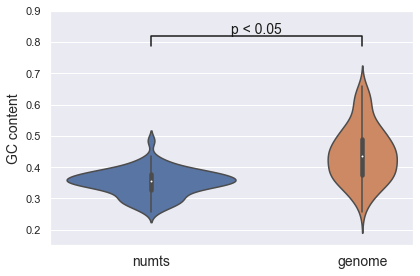

In [187]:
gcs = [numts_gc, nuge_gc]
ax = sns.violinplot(data = gcs)
sns.set(style="darkgrid")
ax.set_ylabel('GC content',
             fontsize = 14)
ax.set_xticklabels(['numts', 'genome'],
                  fontsize = 14)
statistical_annotation([numts_gc, nuge_gc], nuge_significance[1], [0,1], 0.1)
ax.set_ylim(0.15, 0.9)
plt.tight_layout()
#plt.savefig('../../results/gc_contents.png', dpi = 150, quality = 95)
plt.show()

In [188]:
#get the flanking sequences
identifiers = numt_array['g_id']
flanking_seq = numt_array['g_up_flanking'] + numt_array['g_down_flanking']
flanking_seq.index = identifiers
flanking_seq

g_id
MT                                                            NaN
1               ACAAAAGACTCTGAATAGCCAAAGCGATCCTGAACAAGAAAAATCA...
GL019308        GATAAACCCCGATAAACTTTACCACTCTTTGCCAACTCAGCCTCTA...
GL019308        GTAGGAATTATATCCTTCCTCCTCATCGGCTGATGGCATGGCCAAG...
AAGW02081594    GACATGTCAAAGGAACGCAGAAGCCAGCTTGAAAAAGTCCTCAACA...
                                      ...                        
GL019047        GCACTGATCCGAAGGCAGGAGCCAGGTGCTTCTCCTGGTCTCCCAT...
AAGW02081404    GCTCTGAGCTGTCTGACTTGGGGTGGGAAAGGGGGTTTAAATTTAG...
GL019311        GGCTTCTGACTCTGCCCACTAATGCATATCTTGGGAAACAGCAGTA...
21              TTATACTTTACTGCGGTGTTCTCAGTAGTGCACTACTTTGAATACA...
GL018744        GGCAGAGAGCAGGTCAGGAGCCGCGTGCGGGGAGTCCCAGGCCAGA...
Length: 153, dtype: object

In [189]:
#get the identifiers that do not have sequences
ids_to_drop = list(flanking_seq[flanking_seq.apply(lambda x : isinstance(x, float))].index)
ids_to_drop

['MT', 'AAGW02081404', 'AAGW02081404', 'AAGW02081404', 'AAGW02081404']

In [190]:
#drop the previously specified ids
flanking_seq = flanking_seq.drop(labels = ids_to_drop)

In [191]:
#get the gc content of flanking regions
flanking_gc = flanking_seq.apply(lambda x : (x.count('G') + x.count('C')) / len(x))
flanking_gc

g_id
1               0.2975
GL019308        0.4300
GL019308        0.3500
AAGW02081594    0.3550
AAGW02081594    0.6350
                 ...  
GL018826        0.3500
GL019047        0.4875
GL019311        0.4900
21              0.2925
GL018744        0.5850
Length: 122, dtype: float64

In [207]:
for index, element in enumerate(flanking_gc.index.values):
    sequence_to_sample = numtless_sequences[element]
    

0 1
1 GL019308
2 GL019308
3 AAGW02081594
4 AAGW02081594
5 GL019326
6 AAGW02081594
7 GL018741
8 GL019326
9 GL019326
10 GL019326
11 GL019308
12 GL018741
13 GL019308
14 GL019308
15 GL019326
16 GL018741
17 18
18 GL019326
19 9
20 GL018741
21 AAGW02081594
22 12
23 GL018705
24 17
25 1
26 GL018700
27 9
28 1
29 9
30 GL018741
31 19
32 GL019465
33 12
34 GL019465
35 9
36 GL018817
37 13
38 GL018826
39 GL018748
40 1
41 GL018817
42 GL019465
43 GL018817
44 2
45 18
46 17
47 7
48 GL018817
49 GL019465
50 1
51 GL019465
52 18
53 1
54 17
55 16
56 1
57 GL018786
58 13
59 7
60 7
61 GL018706
62 12
63 4
64 GL019271
65 GL019056
66 GL019383
67 GL019525
68 GL019149
69 GL018925
70 4
71 4
72 4
73 GL019149
74 4
75 GL018925
76 4
77 GL019383
78 4
79 18
80 1
81 4
82 20
83 AAGW02083714
84 GL018992
85 AAGW02079688
86 GL019086
87 20
88 GL019010
89 1
90 GL018748
91 AAGW02079688
92 GL018826
93 15
94 GL018826
95 GL018826
96 15
97 GL019047
98 GL018748
99 15
100 GL018862
101 AAGW02079688
102 11
103 GL018826
104 GL018862
105 GL01

In [195]:
#define function for sampling genome based on flanking size
def flanking_based_sampling(g_id):
    sequence_to_sample = numtless_sequences[g_id]
    flanking = flanking_seq[g_id]
    seed_value = flanking.count('A')
    np.random.seed(seed_value)
    flanking_size = 400
    start = np.random.randint(0, len(sequence_to_sample) - flanking_size)
    end = start + flanking_size
    sample_sequence = sequence_to_sample[start:end]
    unknown_nucleotides = sample_sequence.count('N') / len(sample_sequence)
    if unknown_nucleotides < 0.05:
        return sample_sequence
    else:
        np.random.seed(1)
        start = np.random.randint(0, len(sequence_to_sample) - flanking_size)
        end = start + flanking_size
        sample_sequence = sequence_to_sample[start:end]
        return sample_sequence

In [198]:
flage_samples = flanking_gc.apply(flanking_based_sampling)
flage_samples.index = flanking_gc.index.values
flage_samples

KeyError: 0.2975

In [39]:
#normality testing of flanking gc
flanking_normality = anderson(flanking_gc)
flanking_stat = flanking_normality[0]
flanking_critical_value = flanking_normality[1][2]

In [187]:
#statistics (normality testing and significance)
#flanking vs genome
if (flage_stat > flage_critical_value) or (genome_stat > genome_critical_value):
    flage_significance = wilcoxon(flage_gc, genome_gc)
else:
    flage_significance = ttest_ind(flanking_gc, genome_gc)
flage_significance[1]

0.0010491662848207113

In [153]:
proba = pd.Series([1,2,3,4])
proba

0    1
1    2
2    3
3    4
dtype: int64

In [159]:
def trial(element):
    global counter
    counter += 1
    return counter

In [161]:
counter = 0
proba.apply(trial)

0    1
1    2
2    3
3    4
dtype: int64